# ECE 364 Lecture 12 Linear Regression 

## What is Linear Regression (LR)?  
* Linear regression (LR) models the linear relationship between the independent (X) variable with that of the dependent variable (y).
For example, how the likelihood of blood pressure is influenced by a person’s age and weight. This relationship can be explained using linear regression.
* In LR, the y variable should be continuous, whereas the X variable can be continuous or categorical. If both X and y are continuous, the linear relationship can be estimated using correlation coefficient (r) or the coefficient of determination (R-Squared)
* LR is useful if the relationships between the X and y variables are linear
* LR is helpful to predict the value of y based on the value of the X variable

## Iinear Regression<br>
* Given a dataset ${\cal D} = \{(x^{(i)},y^{(i)})\}_{i=1}^N$
* Data $x^{(i)} \in \mathbb{R}^d$
* **Question:** Given new unseen data $𝑥$ how to predict its label $𝑦$?


* For example: likelihood of blood pressure is influenced by a person’s age.<br>
    This relationship can be explained using linear regression.
* We have a data set of blood pressure vs ages from 20 patients. They can be ploted as following.


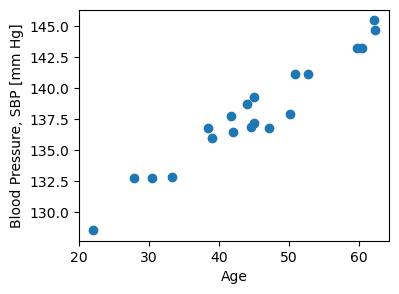

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# x from 20 to 65
x = 20 + 45 * np.random.random((20, 1))
# y = a*x + b with noise
y = 0.4 * x + 120 + np.random.normal(size=x.shape)

# plot the results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)

ax.set_xlabel('Age')
ax.set_ylabel('Blood Pressure, SBP [mm Hg]')

ax.axis('tight')

plt.show()

* **Question:** Can we predit the pressure based on a new patient's age?

* Want to predict a scalar $\hat y$ as a function of a scalar $x$<br>
* Model: $\hat y$ is a linear function of $x$:<br>
> $\it\hat y = wx + b$<br>
> $\hat y$ is the prediction<br>
> $w$ is the weight<br>
> $b$ is the bias<br>
* $w$ and $b$ together are the parameters<br>
* Settings of the parameters are called hypotheses<br>

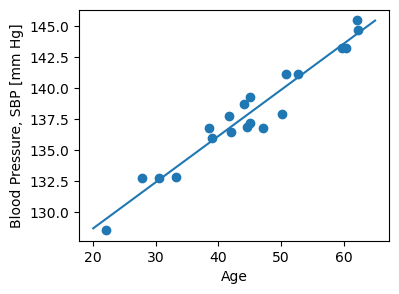

In [28]:
# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
x_new = np.linspace(20, 65, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('Age')
ax.set_ylabel('Blood Pressure, SBP [mm Hg]')

ax.axis('tight')


plt.show()

* How do you know your predited model is accurate? <br>
    or how well your predited function models your dataset?

* **Loss:** Errors of the predition to the real data. Loss helps us to understand how much the predicted value differ from actual value
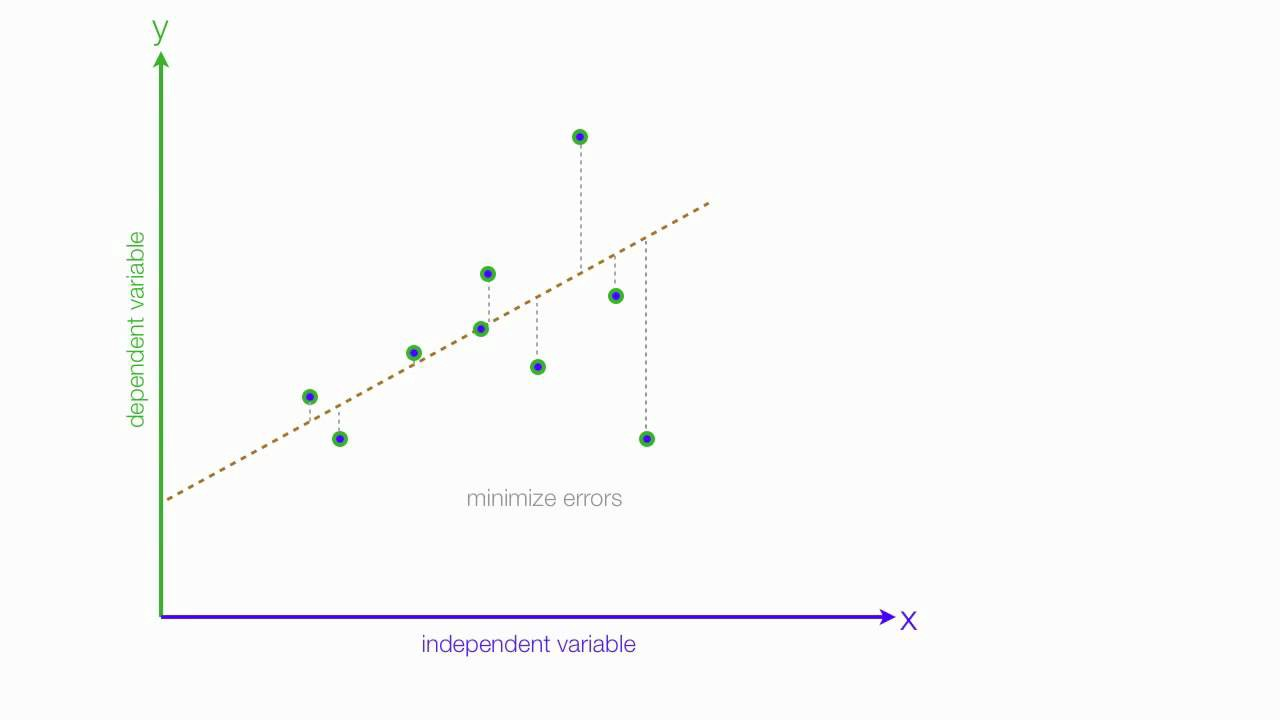 </div> <br>

* **Loss function:** It is a function to predic the loss. It is mainly applies for a single training set.  
     - If your predictions are totally off, your loss function will output a higher number. 
     - If they’re pretty good, it’ll output a lower number. <br>
     



* In linear regression square loss is the most common loss function:
>$L_s(y,\hat y)=(y^{(i)}-\hat y^{(i)})^{2}$  

* **Cost function:** It is a function that measures the performance of a Machine Learning model for given data. Cost Function quantifies the error between predicted values and expected values and presents it in the form of a single real number.
* **Cost function:** loss function averaged over all training examples.<br>
* Difference between a lost function and a cost function: A loss function/error function is for a single training example/input. A cost function, on the other hand, is the average loss over the entire training dataset.

* **Mean Square Error (MSE), also called Quadratic loss or L2 Loss:** Mean Square Error (MSE) is the most commonly used regression cost function. MSE is the sum of squared distances between our target variable, $y$, and predicted values, $\hat y$.
>$MSE=\frac{\sum_i^N (y^{(i)}-\hat y^{(i)})^{2}}{N}$  
* $\it y-\hat y$ is the residual (error), and we want to make this small in magnitude<br>

* How to optimize your linear regression model
* Our goal is to find:   $\underset{w,b}{min}MSE$
* Gradient decent:   
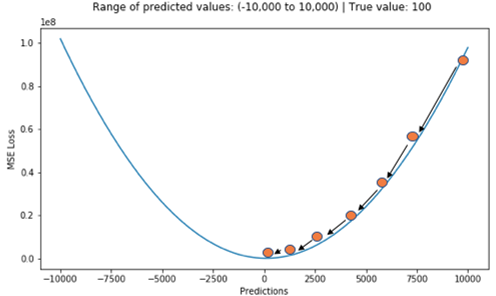 </div> <br>


## An example of how to perform Linear Regression with PyTorch
* Load the dataset and create tensors
We'll create a model that predicts crop yields for apples and oranges (target variables) by looking at the average temperature, rainfall, and humidity (input variables or features) in a region. Here's the training data:

In [29]:
import numpy as np
import torch

# Input (temp, rainfall, humidity)
inputs = torch.tensor ([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype=torch.float32)

# Targets (apples, oranges)
targets = torch.tensor ([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype=torch.float32)

# Convert inputs and targets to tensors
print(inputs)
print(targets)




tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


* The weights and biases $(w_{11}, w_{12},... w_{23})$ and $(b_1, b_2)$ can also be represented as matrices, initialized as random values. The first row of $w$ and the first element of $b$ are used to predict the first target variable, i.e., yield of apples, and similarly, the second for oranges.


In [30]:
# Weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[ 0.2790,  1.5873, -0.6567],
        [-1.2797,  0.3305,  0.7545]], requires_grad=True)
tensor([-0.2280, -0.4864], requires_grad=True)


* Our model is simply a function that performs a matrix multiplication of the inputs and the weights $w$ (transposed) and adds the bias $b$ (replicated for each observation).

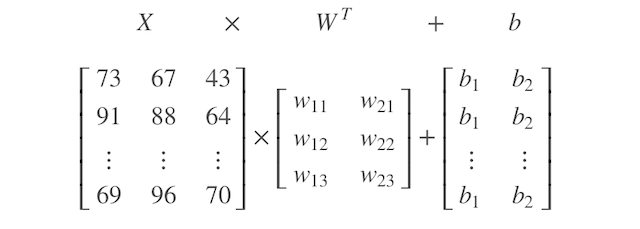 </div><br>  


In [31]:
# We can define the model as follows:
def model(x):
    return x @ w.t() + b

#@ represents matrix multiplication in PyTorch, and the .t method returns the transpose of a tensor.
# The matrix obtained by passing the input data into the model is a set of predictions for the target variables.


# Generate predictions
preds = model(inputs)
print(preds)

# Compare with targets
print(targets)

tensor([[ 98.2498, -39.3193],
        [122.8147, -39.5697],
        [198.6546, -23.7762],
        [ 72.1850, -88.8883],
        [125.4356,  -4.2461]], grad_fn=<AddBackward0>)
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


* You can see that there's a huge difference between the predictions of our model, and the actual values of the target variables. Obviously, this is because we've initialized our model with random weights and biases, and we can't expect it to just work.

* **Loss function:** Before we improve our model, we need a way to evaluate how well our model is performing. We can compare the model's predictions with the actual targets using the following method: <br>

    - Calculate the difference between the two matrices (preds and targets).
    - Square all elements of the difference matrix to remove negative values.
    - Calculate the average of the elements in the resulting matrix.
    - The result is a single number, known as the mean squared error (SE).

In [32]:
# MSE Cost function
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

#torch.sum returns the sum of all the elements in a tensor. The .numel method of a tensor returns the number of elements in a tensor. Let's compute the mean squared error for the current predictions of our model.


# Compute loss
loss = mse(preds, targets)
print(loss)

tensor(10022.7061, grad_fn=<DivBackward0>)


* **Compute gradients:** As in previous lectures, with PyTorch, we can automatically compute the gradient or derivative of the loss w.r.t. to the weights and biases because they have requires_grad set to True. We'll see how this is useful in just a moment.


In [33]:
# Compute gradients
loss.backward()

#The gradients are stored in the .grad property of the respective tensors. Note that the derivative of the loss w.r.t. the weights matrix is itself a matrix with the same dimensions.

# Gradients for weights
print(w)
print(w.grad)

tensor([[ 0.2790,  1.5873, -0.6567],
        [-1.2797,  0.3305,  0.7545]], requires_grad=True)
tensor([[  4097.2500,   4299.1836,   2508.0371],
        [-11151.2549, -11589.4727,  -7215.0610]])


* **Adjust weights and biases to reduce the loss:**
The loss is a quadratic function of our weights and biases, and our objective is to find the set of weights where the loss is the lowest. If we plot a graph of the loss w.r.t any individual weight or bias element, it will look like the figure shown below. An important insight from calculus is that the gradient indicates the rate of change of the loss, i.e., the loss function's slope w.r.t. the weights and biases.

If a gradient element is positive:

* increasing the weight element's value slightly will increase the loss
* decreasing the weight element's value slightly will decrease the loss

If a gradient element is negative:

* increasing the weight element's value slightly will decrease the loss
* decreasing the weight element's value slightly will increase the loss  

The increase or decrease in the loss by changing a weight element is proportional to the gradient of the loss w.r.t. that element. This observation forms the basis of the gradient descent optimization algorithm that we'll use to improve our model (by descending along the gradient).

We can subtract from each weight element a small quantity proportional to the derivative of the loss w.r.t. that element to reduce the loss slightly.

In [34]:
# Generate predictions
preds = model(inputs)
print(preds)

# Calculate the loss
loss = mse(preds, targets)
print(loss)

# Compute gradients
loss.backward()
print(w.grad)
print(b.grad)

# Adjust weights & reset gradients
# We multiply the gradients with a very small number (10^-5 in this case) to ensure that we don't modify the weights by a very large amount. We want to take a small step in the downhill direction of the gradient, not a giant leap. This number is called the learning rate of the algorithm.
# We use torch.no_grad to indicate to PyTorch that we shouldn't track, calculate, or modify gradients while updating the weights and biases.    
# Before we proceed, we reset the gradients to zero by invoking the .zero_() method. We need to do this because PyTorch accumulates gradients. Otherwise, the next time we invoke .backward on the loss, the new gradient values are added to the existing gradients, which may lead to unexpected results.   
    
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()
    
print(w)
print(b)

# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor([[ 98.2498, -39.3193],
        [122.8147, -39.5697],
        [198.6546, -23.7762],
        [ 72.1850, -88.8883],
        [125.4356,  -4.2461]], grad_fn=<AddBackward0>)
tensor(10022.7061, grad_fn=<DivBackward0>)
tensor([[  8194.5000,   8598.3672,   5016.0742],
        [-22302.5098, -23178.9453, -14430.1221]])
tensor([  94.5359, -262.3199])
tensor([[ 0.1970,  1.5013, -0.7068],
        [-1.0567,  0.5623,  0.8988]], requires_grad=True)
tensor([-0.2290, -0.4838], requires_grad=True)
tensor(4238.1924, grad_fn=<DivBackward0>)


* **Train the model using gradient descent**
As seen above, we reduce the loss and improve our model using the gradient descent optimization algorithm. Thus, we can train the model using the following steps:

    1. Generate predictions
    2. Calculate the loss
    3. Compute gradients w.r.t the weights and biases
    4. Adjust the weights by subtracting a small quantity proportional to the gradient
    5. Reset the gradients to zero

* Linear regression using PyTorch built-ins
We've implemented linear regression & gradient descent model using some basic tensor operations. However, since this is a common pattern in deep learning, PyTorch provides several built-in functions and classes to make it easy to create and train models with just a few lines of code.

* Let's begin by importing the **torch.nn** package from PyTorch, which contains utility classes for building neural networks.

In [35]:
import numpy as np
import torch

# Input (temp, rainfall, humidity)
inputs = torch.tensor ([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]],)

# Targets (apples, oranges)
targets = torch.tensor ([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype=torch.float32)

# Convert inputs and targets to tensors
print('inputs=', inputs)
print('targets=', targets)

# Weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print('w=', w)
print('b=', b)

# We can define the model as follows:
def model(x):
    return x @ w.t() + b

# MSE Cost function
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

#@ represents matrix multiplication in PyTorch, and the .t method returns the transpose of a tensor.
# The matrix obtained by passing the input data into the model is a set of predictions for the target variables.

for i in range(1000):
    print('i=', i)

    # Generate predictions
    preds = model(inputs.float())
    

    # Calculate the loss
    loss = mse(preds, targets.float())
    

    # Compute gradients
    loss.backward()
    print('w.grad=', w.grad)
    print('b.grad=', b.grad)

    # Adjust weights & reset gradients
    # We multiply the gradients with a very small number (10^-5 in this case) to ensure that we don't modify the weights by a very large amount. We want to take a small step in the downhill direction of the gradient, not a giant leap. This number is called the learning rate of the algorithm.
    # We use torch.no_grad to indicate to PyTorch that we shouldn't track, calculate, or modify gradients while updating the weights and biases.    
    # Before we proceed, we reset the gradients to zero by invoking the .zero_() method. We need to do this because PyTorch accumulates gradients. Otherwise, the next time we invoke .backward on the loss, the new gradient values are added to the existing gradients, which may lead to unexpected results.   
    
    with torch.no_grad():
        w -= 5e-5 * w.grad 
        b -= 5e-5 * b.grad  
        w.grad.zero_()
        w.grad.zero_()
    
    print('new w', w)
    print('new b', b)

    print('Loss=', loss)
    w.requires_grad = True





inputs= tensor([[ 73,  67,  43],
        [ 91,  88,  64],
        [ 87, 134,  58],
        [102,  43,  37],
        [ 69,  96,  70]])
targets= tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])
w= tensor([[-0.9507, -1.0005,  0.7608],
        [ 2.3370,  0.6812,  0.5952]], requires_grad=True)
b= tensor([-0.7575, -0.6335], requires_grad=True)
i= 0
w.grad= tensor([[-16883.5000, -18872.3691, -11396.0078],
        [ 16899.7832,  16235.1504,  10362.8135]])
b.grad= tensor([-201.4562,  195.2986])
new w tensor([[-0.1065, -0.0569,  1.3306],
        [ 1.4920, -0.1305,  0.0771]], requires_grad=True)
new b tensor([-0.7474, -0.6433], requires_grad=True)
Loss= tensor(41436.9922, grad_fn=<DivBackward0>)
i= 1
w.grad= tensor([[-1457.1974, -2277.9839, -1160.4766],
        [ 2639.2029,   977.0807,   933.2172]])
b.grad= tensor([-219.8831,  221.5971])
new w tensor([[-0.0337,  0.0570,  1.3886],
        [ 1.3600, -0.1794,  0.0304]], requires_grad=True

tensor([[ -5.4308, -13.3233,  31.5406],
        [  7.3203,   8.9495, -32.5144]])
b.grad= tensor([-98.1853, 389.4832])
new w tensor([[-0.4812,  0.7139,  1.0194],
        [-0.1897,  0.9225,  0.6037]], requires_grad=True)
new b tensor([ 0.4251, -3.9663], requires_grad=True)
Loss= tensor(13.2390, grad_fn=<DivBackward0>)
i= 179
w.grad= tensor([[ -5.4365, -13.2330,  31.3992],
        [  7.1852,   8.9836, -32.3655]])
b.grad= tensor([-98.0031, 389.3115])
new w tensor([[-0.4809,  0.7146,  1.0178],
        [-0.1901,  0.9221,  0.6053]], requires_grad=True)
new b tensor([ 0.4300, -3.9858], requires_grad=True)
Loss= tensor(13.1239, grad_fn=<DivBackward0>)
i= 180
w.grad= tensor([[ -5.4407, -13.1436,  31.2586],
        [  7.0550,   9.0168, -32.2167]])
b.grad= tensor([-97.8219, 389.1395])
new w tensor([[-0.4806,  0.7152,  1.0163],
        [-0.1904,  0.9216,  0.6069]], requires_grad=True)
new b tensor([ 0.4349, -4.0052], requires_grad=True)
Loss= tensor(13.0099, grad_fn=<DivBackward0>)
i= 181
w.grad= t

* First we will create a more complex set of numbers. We can do this by using the **torch.randn()** function that will create 50 numbers that are randomly generated in the interval between 0 an 1. Then, we will stretch the values of x to the values in the interval between 0 to 10 by multiplying x with 10.
* Now, we need to create the variable y. For example, we can say that one y is equal to x times 3 minus 4. We will also add some noise to the y. To do this we will use the **torch.randn()** function again, create 50 random numbers and add them to our equation. 

In [36]:
import torch
import numpy as np
x = torch.randn(50)
x = x * 10
y = x * 3 - 4
y += torch.randn(50)
print (x)
print (y)

tensor([ 9.9592e+00, -1.1559e+00, -1.8130e+01,  5.1026e+00,  9.8498e+00,
         4.1219e+00,  3.5523e+00, -1.2832e+01,  1.9814e+01,  3.7433e+00,
        -5.3122e-01, -6.9003e-01, -1.2752e+00, -8.9274e+00, -1.0192e+00,
         9.1375e+00,  1.6884e-02, -1.3735e+01, -1.6743e+01,  3.1011e+00,
        -7.4373e+00,  2.6078e+00, -1.1220e+01,  3.3638e+01,  3.2329e+00,
        -1.1468e+00, -4.6981e+00, -7.6215e-01,  1.0173e+01, -8.0256e+00,
         1.7872e+01,  3.7482e+00,  1.2960e+01,  2.5794e+00,  2.1208e+00,
         1.0533e+01, -1.2189e+01,  8.8070e+00,  4.1140e+00,  3.1796e+00,
        -1.6276e+00, -2.7042e+00, -5.7163e+00,  7.3928e+00,  6.5555e+00,
         9.9304e+00,  7.1724e+00, -6.6134e+00,  2.1841e+00, -2.9298e+00])
tensor([ 25.9278,  -7.3948, -56.3655,  12.0803,  24.8346,   7.6864,   7.4171,
        -42.7607,  55.7748,   6.1029,  -5.8227,  -7.5651,  -8.1346, -29.6330,
         -6.4996,  24.8029,  -5.6461, -44.7517, -55.6080,   5.2027, -25.4190,
          3.7784, -38.9737,  97.091

* Next step is to create a class called **LinearModel()**. To be able to use it as a PyTorch model, we will pass **torch. nn.Module** as a parameter. Now, we will define the **init function** or the constructor by passing parameter **self**.

In [37]:
class LinearModel(torch.nn.Module):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.linear = torch.nn.Linear(1, 1)
  
  def forward(self, x):
    return self.linear(x)


* Then we will call the **super()** function of the linear model. Note, that because this is a linear regression model, so it will have only **one layer**. That is why we will create a **self**. linear variable in which we’ll call the **torch.nn.Linear()** function. This function takes two input parameters. The first one is the **size** of each input sample. This parameter will be equal to 1 because we have only numbers. The second parameter is the shape of the **output** which will also be equal to 1. 
* Now, we will create the **forward()** function which will take **self** and **x** as inputs. Finally, we will return **self. linear** and we’ll pass in **x** as input.

In [38]:
x_torch = torch.FloatTensor(x).reshape(-1, 1)
y_torch = torch.FloatTensor(y).reshape(-1, 1)

print(x_torch)

tensor([[ 9.9592e+00],
        [-1.1559e+00],
        [-1.8130e+01],
        [ 5.1026e+00],
        [ 9.8498e+00],
        [ 4.1219e+00],
        [ 3.5523e+00],
        [-1.2832e+01],
        [ 1.9814e+01],
        [ 3.7433e+00],
        [-5.3122e-01],
        [-6.9003e-01],
        [-1.2752e+00],
        [-8.9274e+00],
        [-1.0192e+00],
        [ 9.1375e+00],
        [ 1.6884e-02],
        [-1.3735e+01],
        [-1.6743e+01],
        [ 3.1011e+00],
        [-7.4373e+00],
        [ 2.6078e+00],
        [-1.1220e+01],
        [ 3.3638e+01],
        [ 3.2329e+00],
        [-1.1468e+00],
        [-4.6981e+00],
        [-7.6215e-01],
        [ 1.0173e+01],
        [-8.0256e+00],
        [ 1.7872e+01],
        [ 3.7482e+00],
        [ 1.2960e+01],
        [ 2.5794e+00],
        [ 2.1208e+00],
        [ 1.0533e+01],
        [-1.2189e+01],
        [ 8.8070e+00],
        [ 4.1140e+00],
        [ 3.1796e+00],
        [-1.6276e+00],
        [-2.7042e+00],
        [-5.7163e+00],
        [ 7

* Now when we have defined our data, we can start coding the training part. We will start by creating a variable **model** which will be used for calling our **LinearModel class**. Then, we will calculate the loss by using the function **torch.nn.MSELoss()**. With this function we will calculate the mean squared error. 

In [39]:
model = LinearModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005) # We will talk about this optimzer in next lexture

* The next step is to train of our model. First we will create a for loop that will iterate in the range from 0 to 1000.

In [40]:
all_loss = []

for epoch in range(1000):
  y_hat = model(x_torch)

  loss = criterion(y_hat, y_torch)
  loss.backward()
  all_loss.append(loss.item())

  optimizer.step()
  optimizer.zero_grad()
    
print (all_loss)

[741.083984375, 18.929676055908203, 12.738565444946289, 12.465985298156738, 12.246581077575684, 12.031825065612793, 11.821233749389648, 11.614725112915039, 11.412219047546387, 11.213630676269531, 11.018896102905273, 10.827932357788086, 10.640666961669922, 10.457030296325684, 10.276952743530273, 10.100364685058594, 9.927202224731445, 9.757390975952148, 9.59086799621582, 9.42757511138916, 9.267443656921387, 9.110419273376465, 8.956433296203613, 8.805432319641113, 8.657356262207031, 8.512152671813965, 8.369758605957031, 8.23012638092041, 8.0931978225708, 7.95892333984375, 7.827250957489014, 7.6981306076049805, 7.571511268615723, 7.447343826293945, 7.325583457946777, 7.206182479858398, 7.089095592498779, 6.974278450012207, 6.8616838455200195, 6.751272201538086, 6.642999172210693, 6.536825180053711, 6.432708740234375, 6.330606460571289, 6.230486869812012, 6.132303237915039, 6.0360236167907715, 5.9416117668151855, 5.849025726318359, 5.758236885070801, 5.669206142425537, 5.581898212432861, 5.

* Now, let’s make some predictions with the model.forward() function and plot

In [41]:
y_pred = model.forward(x_torch)
print (y_pred)


tensor([[ 26.0181],
        [ -7.4451],
        [-58.5462],
        [ 11.3970],
        [ 25.6888],
        [  8.4443],
        [  6.7296],
        [-42.5964],
        [ 55.6877],
        [  7.3047],
        [ -5.5644],
        [ -6.0425],
        [ -7.8044],
        [-30.8420],
        [ -7.0335],
        [ 23.5444],
        [ -3.9143],
        [-45.3156],
        [-54.3713],
        [  5.3711],
        [-26.3561],
        [  3.8860],
        [-37.7447],
        [ 97.3053],
        [  5.7679],
        [ -7.4177],
        [-18.1093],
        [ -6.2596],
        [ 26.6616],
        [-28.1271],
        [ 49.8394],
        [  7.3193],
        [ 35.0524],
        [  3.8005],
        [  2.4200],
        [ 27.7455],
        [-40.6621],
        [ 22.5493],
        [  8.4205],
        [  5.6074],
        [ -8.8651],
        [-12.1065],
        [-21.1747],
        [ 18.2919],
        [ 15.7708],
        [ 25.9316],
        [ 17.6282],
        [-23.8754],
        [  2.6103],
        [-12.7855]],

## Multivariable linear regression
* Given a dataset ${\cal D} = \{(x^{(i)},y^{(i)})\}_{i=1}^N$, Each observation $i$ includes a scalar response $y_{i}$ and a column vector ${x}_{i}$ of $p$ parameters (regressors), $x^{(i)}=\left\{ x_{i1},x_{i2},\cdots,x_{im}\right\} ^{T}$
* Data $x^{(i)} \in \mathbb{R}^d$

* Want to predict a scalar $\hat y$ as a function of a scalar $x$<br>
* Model: $\hat y$ is a linear function of $x$:<br>
> $\it\hat y = wx + b$<br>
> $\hat y$ is the prediction<br>
> $w$ is the weight<br>
> $b$ is the bias<br>
* $w$ and $b$ together are the parameters<br>
* In linear regression square loss is the most common loss function:
>$L_s(y,\hat y)=(y^{(i)}-\hat y^{(i)})^{2}$
* In a linear regression model, the response variable, $y_{i}$, is a linear function of the regressors and can be presented in the form of a general equation as follows::
$y^{(i)}=w_{1}x_{i1}+w_{2}x_{i2}+\cdots+w_{m}x_{im}+e_{i}$ 
* The general equation can be written in vector form  
$\left[\begin{array}{c}
y_{1}\\
y_{2}\\
\vdots\\
y_{n}
\end{array}\right]$=$\left[\begin{array}{ccccc}
x_{11} & x_{12} & x_{13} & \cdots & x_{1m}\\
x_{21} & x_{22} & x_{23} & \cdots & x_{2m}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
x_{n1} & x_{n2} & x_{n3} & \cdots & x_{nm}
\end{array}\right]$$\left[\begin{array}{c}
w_{1}\\
w_{2}\\
\vdots\\
w_{n}
\end{array}\right]+\left[\begin{array}{c}
e_{1}\\
e_{2}\\
\vdots\\
e_{n}
\end{array}\right]$
* It is equal to $\boldsymbol{Y}=\boldsymbol{\boldsymbol{X}W}+\boldsymbol{E}$




* regression coefficients are obtained by minimizing the residual squares, so that the normal equation is obtained as follows:<br>
$nw_{0}+w_{1}\sum x_{1j}+w_{2}\sum x_{2j}+\cdots+w_{m}\sum x_{m}=\sum y_{j}$ <br>
$w_{0}\sum x_{1j}+w_{1}\sum x_{2j}^{2}+w_{2}\sum x_{1j}x_{2j}+\cdots+w_{m}\sum x_{1j}x_{mj}=\sum x_{1j}y_{j}$<br>
$w_{0}\sum x_{2j}+w_{1}\sum x_{1j}x_{2j}+w_{2}\sum x_{2j}^{2}+\cdots+w_{m}\sum x_{2j}x_{mj}=\sum x_{2j}y_{j}$<br>
$\vdots$<br>
$w_{0}\sum x_{mj}+w_{1}\sum x_{1j}x_{mj}+w_{2}\sum x_{2j}x_{mj}+\cdots+w_{m}\sum x_{mj}^{2}=\sum x_{mj}y_{j}$<br>


* Equations can be written in matrix notation as follows:  
$\left[\begin{array}{ccccc}
n & \sum x_{1j} & \sum x_{2j} & \cdots & \sum x_{mj}\\
\sum x_{1j} & \sum x_{1j}^{2} & \sum x_{1j}x_{2j} & \cdots & \sum x_{1j}x_{mj}\\
\sum x_{2j} & \sum x_{1j}x_{2j} & \sum x_{2j}^{2} & \cdots & \sum x_{2j}x_{mj}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
\sum x_{mj} & \sum x_{1j}x_{mj} & \sum x_{2j}x_{mj} & \cdots & \sum x_{mj}^{2}
\end{array}\right]\left[\begin{array}{c}
w_{1}\\
w_{2}\\
\vdots\\
w_{m}
\end{array}\right]=\left[\begin{array}{c}
\sum y_{j}\\
\sum x_{1j}y_{j}\\
\sum x_{2j}y_{j}\\
\vdots\\
\sum x_{mj}y_{j}
\end{array}\right]$
* It is equal to  $\boldsymbol{XW}=\boldsymbol{Y}$  
* where $\boldsymbol{X}$ matrix is called the covariance matrix.

* Cholesky Decomposition:
$\boldsymbol{X}$ is a definite symmetric and positive
matrix, $X_{ij}=X_{ji}$, then $\boldsymbol{X}$ can be written  
$\boldsymbol{X}=\boldsymbol{L}\boldsymbol{L}^{T}$  
Where $\boldsymbol{L}$ is the bottom triangle matrix which is defined as follows:  
$\boldsymbol{L}=\left[\begin{array}{cccc}
l_{11} & 0 & \cdots & 0\\
l_{12} & l_{22} & \cdots & 0\\
\vdots & \vdots & \ddots & \vdots\\
l_{n1} & l_{n2} & \cdots & l_{nn}
\end{array}\right]$ <br>
Where  
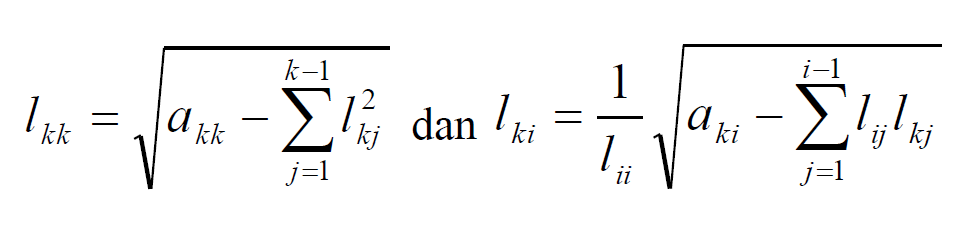 </div> <br>

* To solve $\boldsymbol{XW}=\boldsymbol{Y}$ then solution $\boldsymbol{W}$ is
obtained by: (a) forward substitution: solution $d$ uses $\boldsymbol{Ld}=\boldsymbol{W}$, then (b) back substitution:
solution $\boldsymbol{W}$ uses $\boldsymbol{L^{T}W}=\boldsymbol{d}$.